<a href="https://colab.research.google.com/github/DB11051998/Pothole-Detection/blob/master/RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd  drive/My\ Drive/pothole

/content/drive/My Drive/pothole


In [ ]:
%ls

 annotated/
'Copy of Copy of Increase RAM Reference Notes By Techhawa .ipynb'
 download.jpeg
 images/
 kernel53192baf7b.ipynb
 Mask_RCNN/
 Mask-RCNN.ipynb
 RCNN.ipynb
 README.md
 splits.json


In [ ]:
## !wget https://github.com/1297rohit/RCNN/raw/master/Airplanes_Annotations.zip


In [ ]:
! pip install opencv-contrib-python

# Implementation of RCNN  




In [ ]:
import os
import cv2
import keras
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.


In [ ]:
#for i in os.listdir('annotated-images/'):
#  if '.jpg' in i: 
#    shutil.move('/content/drive/My Drive/pothole/annotated-images/'+i, '/content/drive/My Drive/pothole/images/'+i)
#  else:
#    shutil.move('/content/drive/My Drive/pothole/annotated-images/'+i, '/content/drive/My Drive/pothole/annotated/'+i)


In [ ]:
ls

 annotated/
'Copy of Copy of Increase RAM Reference Notes By Techhawa .ipynb'
 download.jpeg
 images/
 kernel53192baf7b.ipynb
 Mask_RCNN/
 Mask-RCNN.ipynb
 RCNN.ipynb
 README.md
 splits.json


In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou


In [ ]:
from xml.etree import ElementTree

def extract_boxes(filename):
    # load and parse the file
    tree = ElementTree.parse(filename)
    # get the root of the document
    root = tree.getroot()
    # extract each bounding box
    boxes = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        #coors = [xmin, ymin, xmax, ymax]
        #gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
        boxes.append({"x1":xmin,"x2":xmax,"y1":ymin,"y2":ymax})
    # extract image dimensions
    #width = int(root.find('.//size/width').text)
    #height = int(root.find('.//size/height').text)
    return boxes

In [ ]:
annot='/content/drive/My Drive/pothole/annotated/'
images='/content/drive/My Drive/pothole/images/'

Text(0.5, 1.0, 'Region proposed from an image')

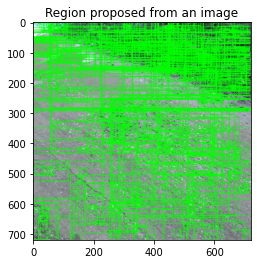

In [ ]:
im = cv2.imread(images+'img-261.jpg')
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)
plt.title('Region proposed from an image')

In [ ]:
for e,i in enumerate(os.listdir(annot)):
  print(i)

img-80.xml
img-627.xml
img-387.xml
img-70.xml
img-79.xml
img-39.xml
img-77.xml
img-607.xml
img-587.xml
img-659.xml
img-78.xml
img-557.xml
img-537.xml
img-432.xml
img-600.xml
img-372.xml
img-66.xml
img-61.xml
img-500.xml
img-654.xml
img-559.xml
img-620.xml
img-563.xml
img-436.xml
img-399.xml
img-446.xml
img-461.xml
img-543.xml
img-645.xml
img-469.xml
img-553.xml
img-626.xml
img-472.xml
img-499.xml
img-510.xml
img-463.xml
img-438.xml
img-397.xml
img-82.xml
img-364.xml
img-422.xml
img-457.xml
img-658.xml
img-581.xml
img-528.xml
img-411.xml
img-388.xml
img-518.xml
img-610.xml
img-465.xml
img-353.xml
img-529.xml
img-519.xml
img-474.xml
img-369.xml
img-467.xml
img-407.xml
img-65.xml
img-524.xml
img-476.xml
img-608.xml
img-460.xml
img-636.xml
img-415.xml
img-562.xml
img-424.xml
img-657.xml
img-42.xml
img-47.xml
img-582.xml
img-363.xml
img-365.xml
img-83.xml
img-488.xml
img-481.xml
img-545.xml
img-5.xml
img-618.xml
img-520.xml
img-526.xml
img-62.xml
img-653.xml
img-541.xml
img-477.xml
img-393.

In [ ]:
'img-140.xml'.split(".")[0]

'img-140'

In [ ]:
train_images=[]
train_labels=[]

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("img"):
            filename = i.split(".")[0]+".jpg"
            annotname= i.split(".")[0]+".xml"
            print(e,filename)
            image = cv2.imread(os.path.join(images,filename))
            box = extract_boxes(os.path.join(annot,annotname))
            #gtvalues=[]
            #for row in df.iterrows():
            #    x1 = int(row[1][0].split(" ")[0])
            #    y1 = int(row[1][0].split(" ")[1])
            #    x2 = int(row[1][0].split(" ")[2])
            #    y2 = int(row[1][0].split(" ")[3])
            #    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in box:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 img-293.jpg
1 img-199.jpg
2 img-303.jpg
3 img-352.jpg
4 img-222.jpg
5 img-14.jpg
6 img-313.jpg
7 img-155.jpg
8 img-170.jpg
9 img-315.jpg
10 img-301.jpg
11 img-346.jpg
12 img-325.jpg
13 img-262.jpg
14 img-181.jpg
15 img-212.jpg
16 img-185.jpg
17 img-289.jpg
18 img-279.jpg
19 img-261.jpg
20 img-165.jpg
21 img-322.jpg
22 img-284.jpg
23 img-273.jpg
24 img-17.jpg
25 img-264.jpg
26 img-15.jpg
27 img-178.jpg
28 img-134.jpg
29 img-274.jpg
30 img-236.jpg
31 img-205.jpg
32 img-152.jpg
33 img-280.jpg
34 img-298.jpg
35 img-29.jpg
36 img-220.jpg
37 img-286.jpg
38 img-179.jpg
39 img-296.jpg
40 img-283.jpg
41 img-345.jpg
42 img-189.jpg
43 img-340.jpg
44 img-275.jpg
45 img-143.jpg
46 img-169.jpg
47 img-311.jpg
48 img-277.jpg
49 img-191.jpg
50 img-223.jpg
51 img-333.jpg
52 img-259.jpg
53 img-200.jpg
54 img-307.jpg
55 img-335.jpg
56 img-245.jpg
57 img-237.jpg
inside
58 img-146.jpg
59 img-260.jpg
60 img-154.jpg
61 img-166.jpg
62 img-210.jpg
63 img-204.jpg
64 img-308.jpg
65 img-297.jpg
66 img-323.jpg
67

In [ ]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [ ]:
np.save('train_image.np', train_images)
np.save('train_labels.np', train_labels)

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467904/553467096 [==============================] - 42s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [ ]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [ ]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(input = vggmodel.input, output = predictions)
opt = Adam(lr=0.0001)
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(train_labels)

In [ ]:
#X_train, X_test , y_train, y_test = train_test_split(train_images,Y,test_size=0.10)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=train_images, y=Y)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90,subset='validation')
testdata = tsdata.flow(x=train_images, y=Y)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping


NameError: ignored